# Predict syllable from age. Figure out which regression models perform best predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from aging.behavior.jax_regressor import JaxRegressor, multi_model_function, model_loss_l1

In [2]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/longtogeny_males_clean.parquet')

In [3]:
df = df[df.index.get_level_values('age') < 600]

In [4]:
mouse = df.loc[pd.IndexSlice[:, '01_01'], :]
mouse

,,,,,relabeled_syllables,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
age,mouse,cage,uuid,subject_name,date,,,,,,,,,,,,,,,,,,,,,
21,01_01,01,2c031642-6e7a-4b1a-8b0c-eaa2f28ef089,01_01_021,2021-03-30 14:49:21,0.016502,0.025931,0.012730,0.002357,0.018859,0.015087,0.022631,0.008487,0.011315,0.013673,...,0.015559,0.016973,0.030174,0.017916,0.000000,0.023574,0.017445,0.004715,0.006601,0.000471
22,01_01,01,e3e86c43-3f2a-4ace-8734-9e08a9b1ab1f,01_01_022,2021-03-31 14:30:40,0.011423,0.019990,0.010471,0.001904,0.021418,0.011899,0.021894,0.008567,0.004284,0.009043,...,0.017611,0.011423,0.029510,0.008567,0.001904,0.035697,0.024750,0.008567,0.016183,0.000000
23,01_01,01,4818c44f-9a6b-4575-8b57-99a3a49f2a1f,01_01_23,2021-04-01 14:48:07,0.012072,0.021630,0.010060,0.005030,0.026157,0.019618,0.019618,0.014085,0.008048,0.006539,...,0.018109,0.004527,0.028672,0.016600,0.001006,0.031187,0.022133,0.009054,0.006036,0.000000
24,01_01,01,a5305f21-559f-48ee-a5b2-0b662906d763,01_01_024,2021-04-02 15:01:09,0.010304,0.019204,0.014988,0.000937,0.021077,0.016862,0.018267,0.012646,0.011241,0.007026,...,0.023888,0.009368,0.026230,0.006557,0.004684,0.036066,0.010304,0.003279,0.003279,0.000468
25,01_01,01,81054d18-7c89-4c26-ad54-9591e94abc63,01_01_025,2021-04-03 14:39:28,0.017687,0.019955,0.009524,0.002268,0.028118,0.019955,0.017234,0.017234,0.009070,0.013152,...,0.020862,0.013152,0.022222,0.008617,0.002268,0.022676,0.009070,0.006349,0.000907,0.000454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,01_01,01,80bbe52f-5b5c-43af-bfb9-828b115c9c5b,01_01_212,2022-06-01 11:47:32,0.074388,0.047429,0.038942,0.036445,0.032451,0.028957,0.040439,0.033450,0.026460,0.047429,...,0.006490,0.002996,0.000499,0.000000,0.010484,0.002496,0.001498,0.000000,0.000499,0.000000
460,01_01,01,78ca3592-f82f-4167-9fdd-72a1784ada49,01_01_213,2022-06-12 15:30:03,0.072277,0.058416,0.046040,0.055446,0.032673,0.048020,0.033663,0.045050,0.034158,0.043069,...,0.005941,0.000495,0.000495,0.000000,0.005941,0.000495,0.000990,0.000000,0.000990,0.000000
468,01_01,01,81dff8df-ef0b-4bfc-993a-acf41c2d2662,01_01_214,2022-06-20 09:58:09,0.076042,0.041228,0.032982,0.033440,0.038937,0.029317,0.037563,0.043518,0.030692,0.052680,...,0.005955,0.002290,0.001374,0.000000,0.009620,0.001374,0.000916,0.000916,0.002290,0.000000


In [5]:
folds = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train, test in folds.split(mouse):
    break

In [36]:
x = StandardScaler().fit_transform(df.index.get_level_values('age').to_numpy()[:, None])
y = StandardScaler().fit_transform(df)

In [7]:
# train_x = x[train]
# train_y = y[train]
# test_x = x[test]
# test_y = y[test]

## Do it for real

In [37]:
coef_shapes = {
    "exponential_params": dict(a=(1, 1), b=(1, 1), c=(1, 1), offset=(1, 1)),
    "linear_params": dict(m=(1, 1), b=(1, 1)),
    "logistic_params": dict(m=(1, 1), b=(1, 1), offset=(1, 1), scale=(1, 1)),
    "quadratic_params": dict(a=(1, 1), b=(1, 1), c=(1, 1)),
    "submodel_weights": (4, 1),
}
mdl = JaxRegressor(
    jit=True,
    model=multi_model_function,
    loss_fun=model_loss_l1,
    n_iter=4000,
    l1=0.001,
    lr=1e-2,
    coef_shapes=coef_shapes,
)

In [44]:
# l1_vals = [0, 0.1, 0.25, 0.8, 0.9, 0.95, 0.99]
l1_vals = np.logspace(-5, 0, 11)
cv = GridSearchCV(
    mdl,
    dict(l1=l1_vals),
    cv=ShuffleSplit(n_splits=4, test_size=0.3, random_state=0),
)

In [45]:
cv.fit(x, y[:, 0])

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=0, test_size=0.3, train_size=None),
             estimator=JaxRegressor(coef_shapes={'exponential_params': {'a': (1,
                                                                              1),
                                                                        'b': (1,
                                                                              1),
                                                                        'c': (1,
                                                                              1),
                                                                        'offset': (1,
                                                                                   1)},
                                                 'linear_params': {'b': (1, 1),
                                                                   'm': (1, 1)},
                                                 'logistic_params': {'b': (1,
                                                                           1),
                                                                     'm': (1,
                                                                           1),
                                                                     'offset': (1,
                                                                                1),
                                                                     'scale': (1,
                                                                               1)},
                                                 'quadratic_params': {'a': (1,
                                                                            1),
                                                                      'b': (1,
                                                                            1),
                                                                      'c': (1,
                                                                            1)},
                                                 'submodel_weights': (4, 1)},
                                    l1=0.001,
                                    loss_fun=<function model_loss_l1 at 0x7fb7d1250430>,
                                    lr=0.01,
                                    model=<function multi_model_function at 0x7fb7d1250af0>,
                                    n_iter=4000),
             param_grid={'l1': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00])})

In [46]:
cv.best_params_

{'l1': 0.31622776601683794}

In [47]:
cv.best_score_

0.5365112285062532

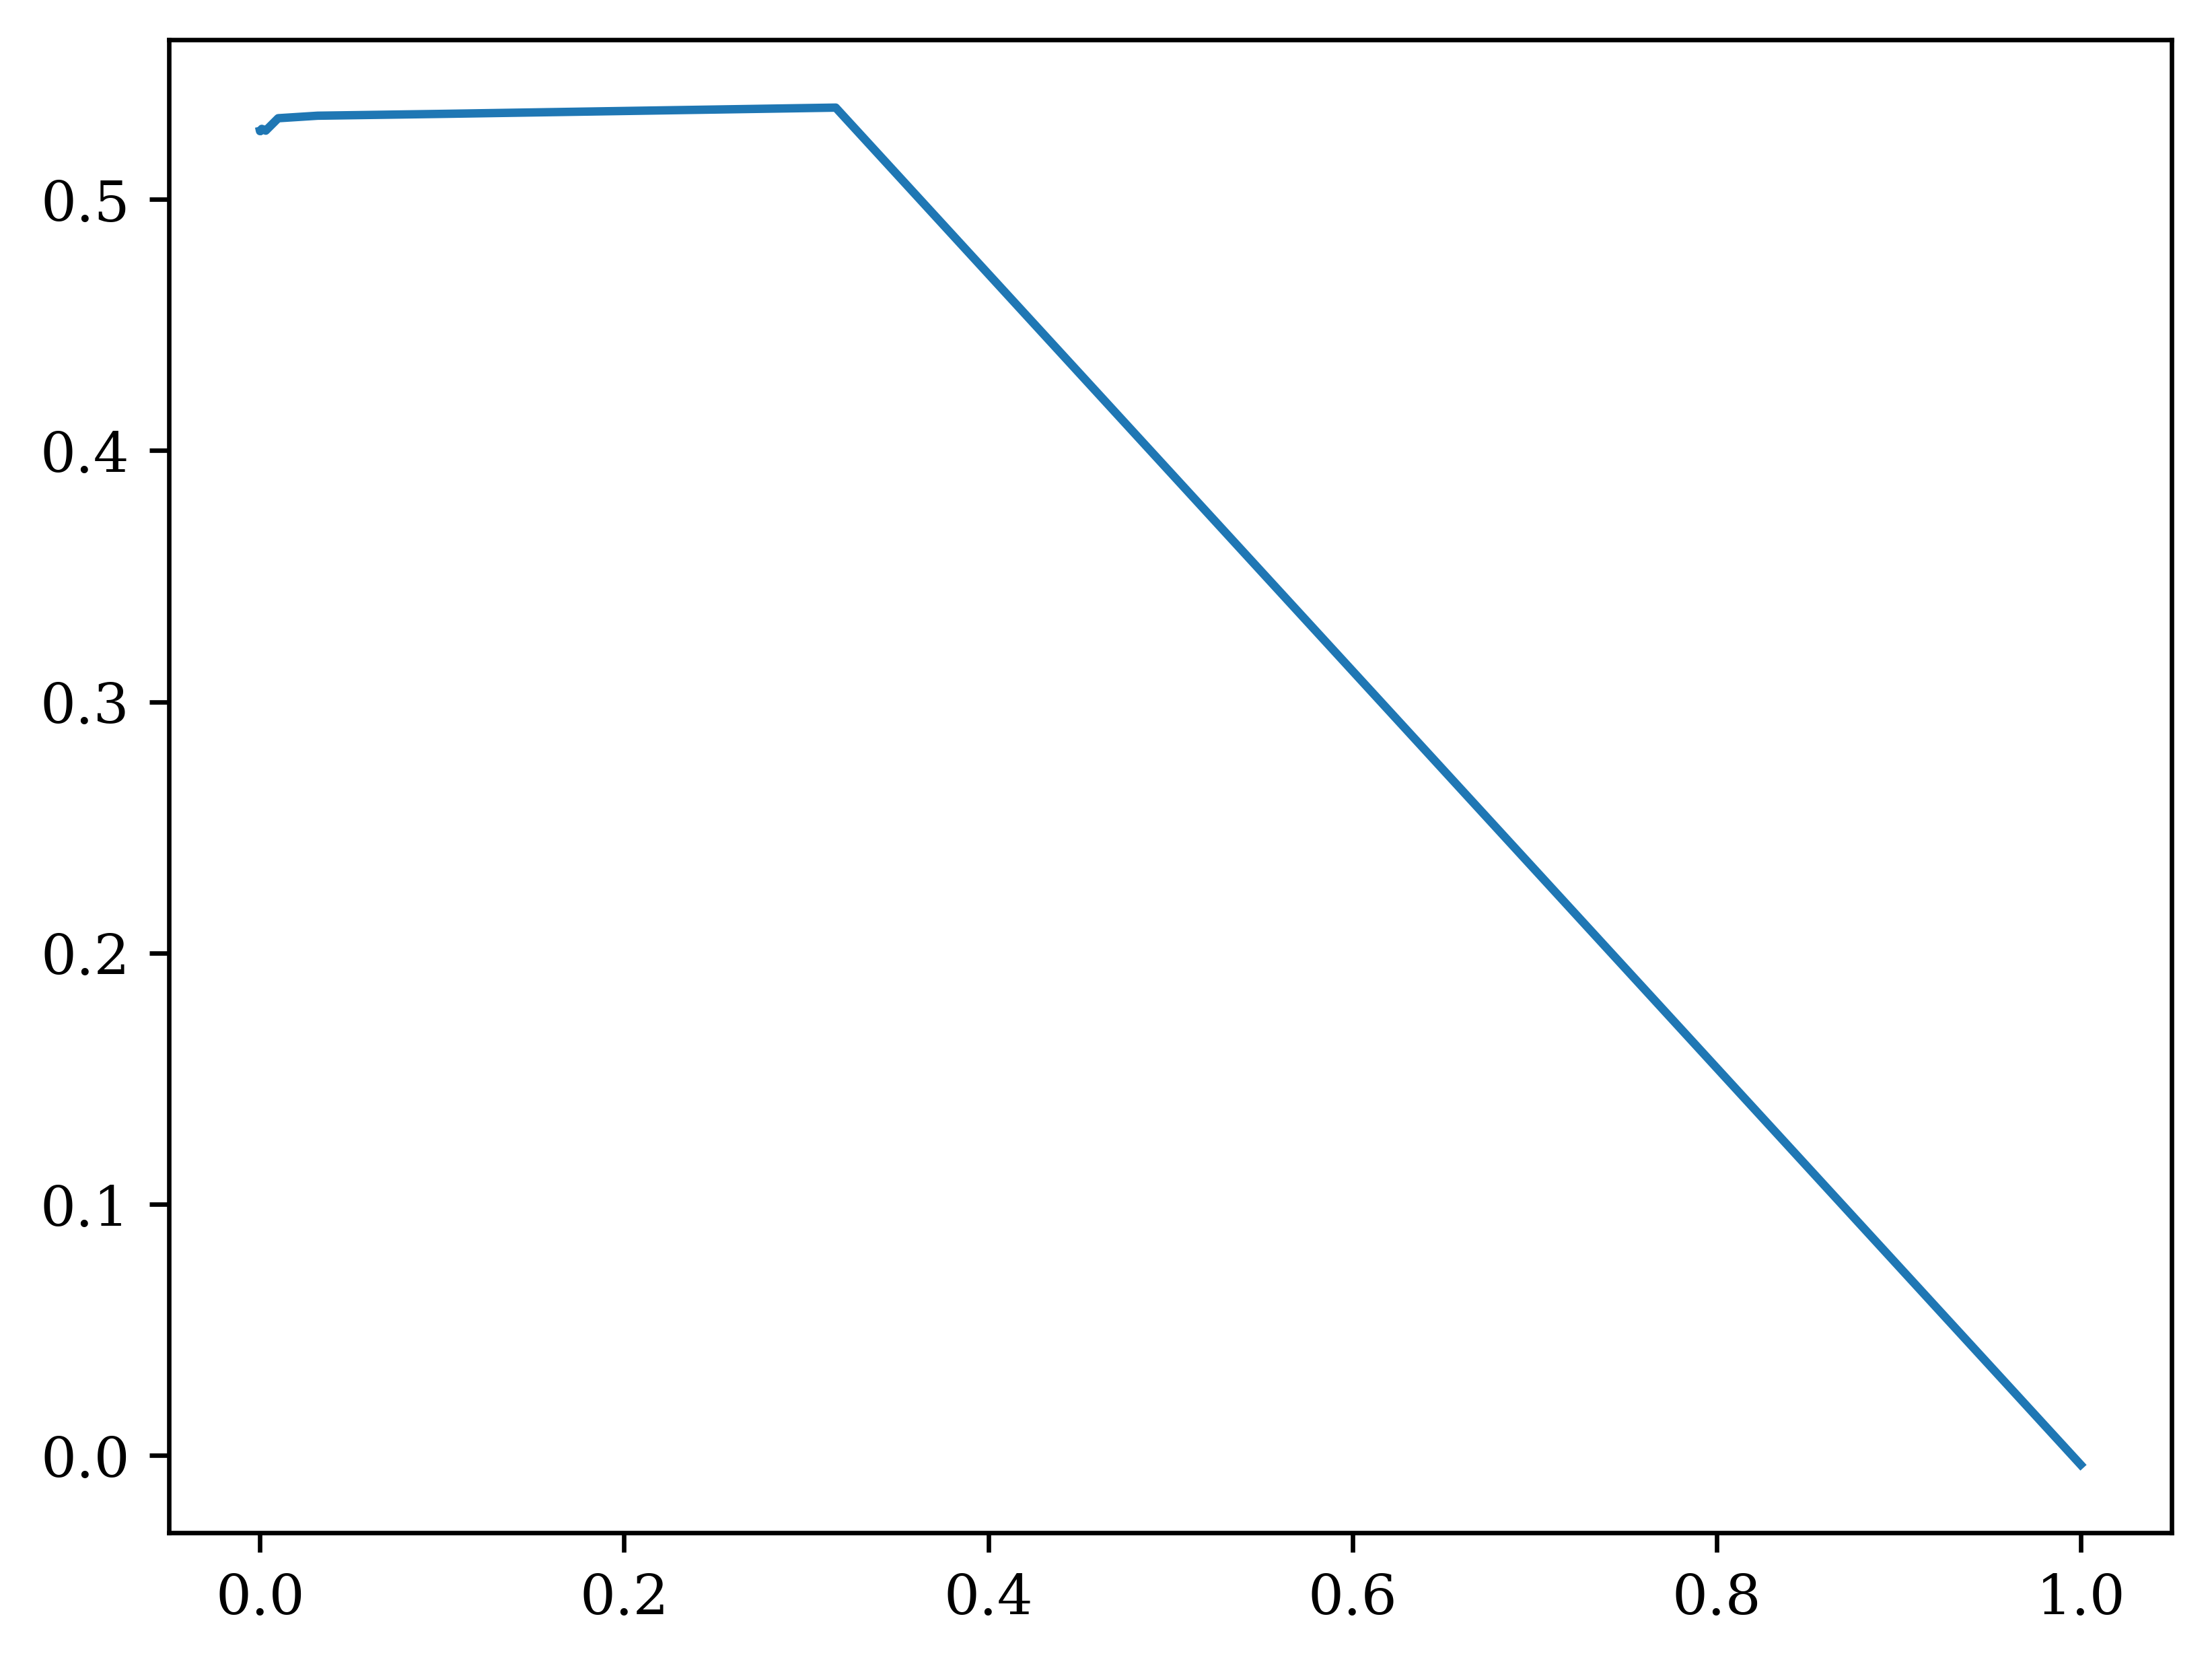

In [48]:
plt.plot(l1_vals, cv.cv_results_['mean_test_score'])
# plt.axhline(0)

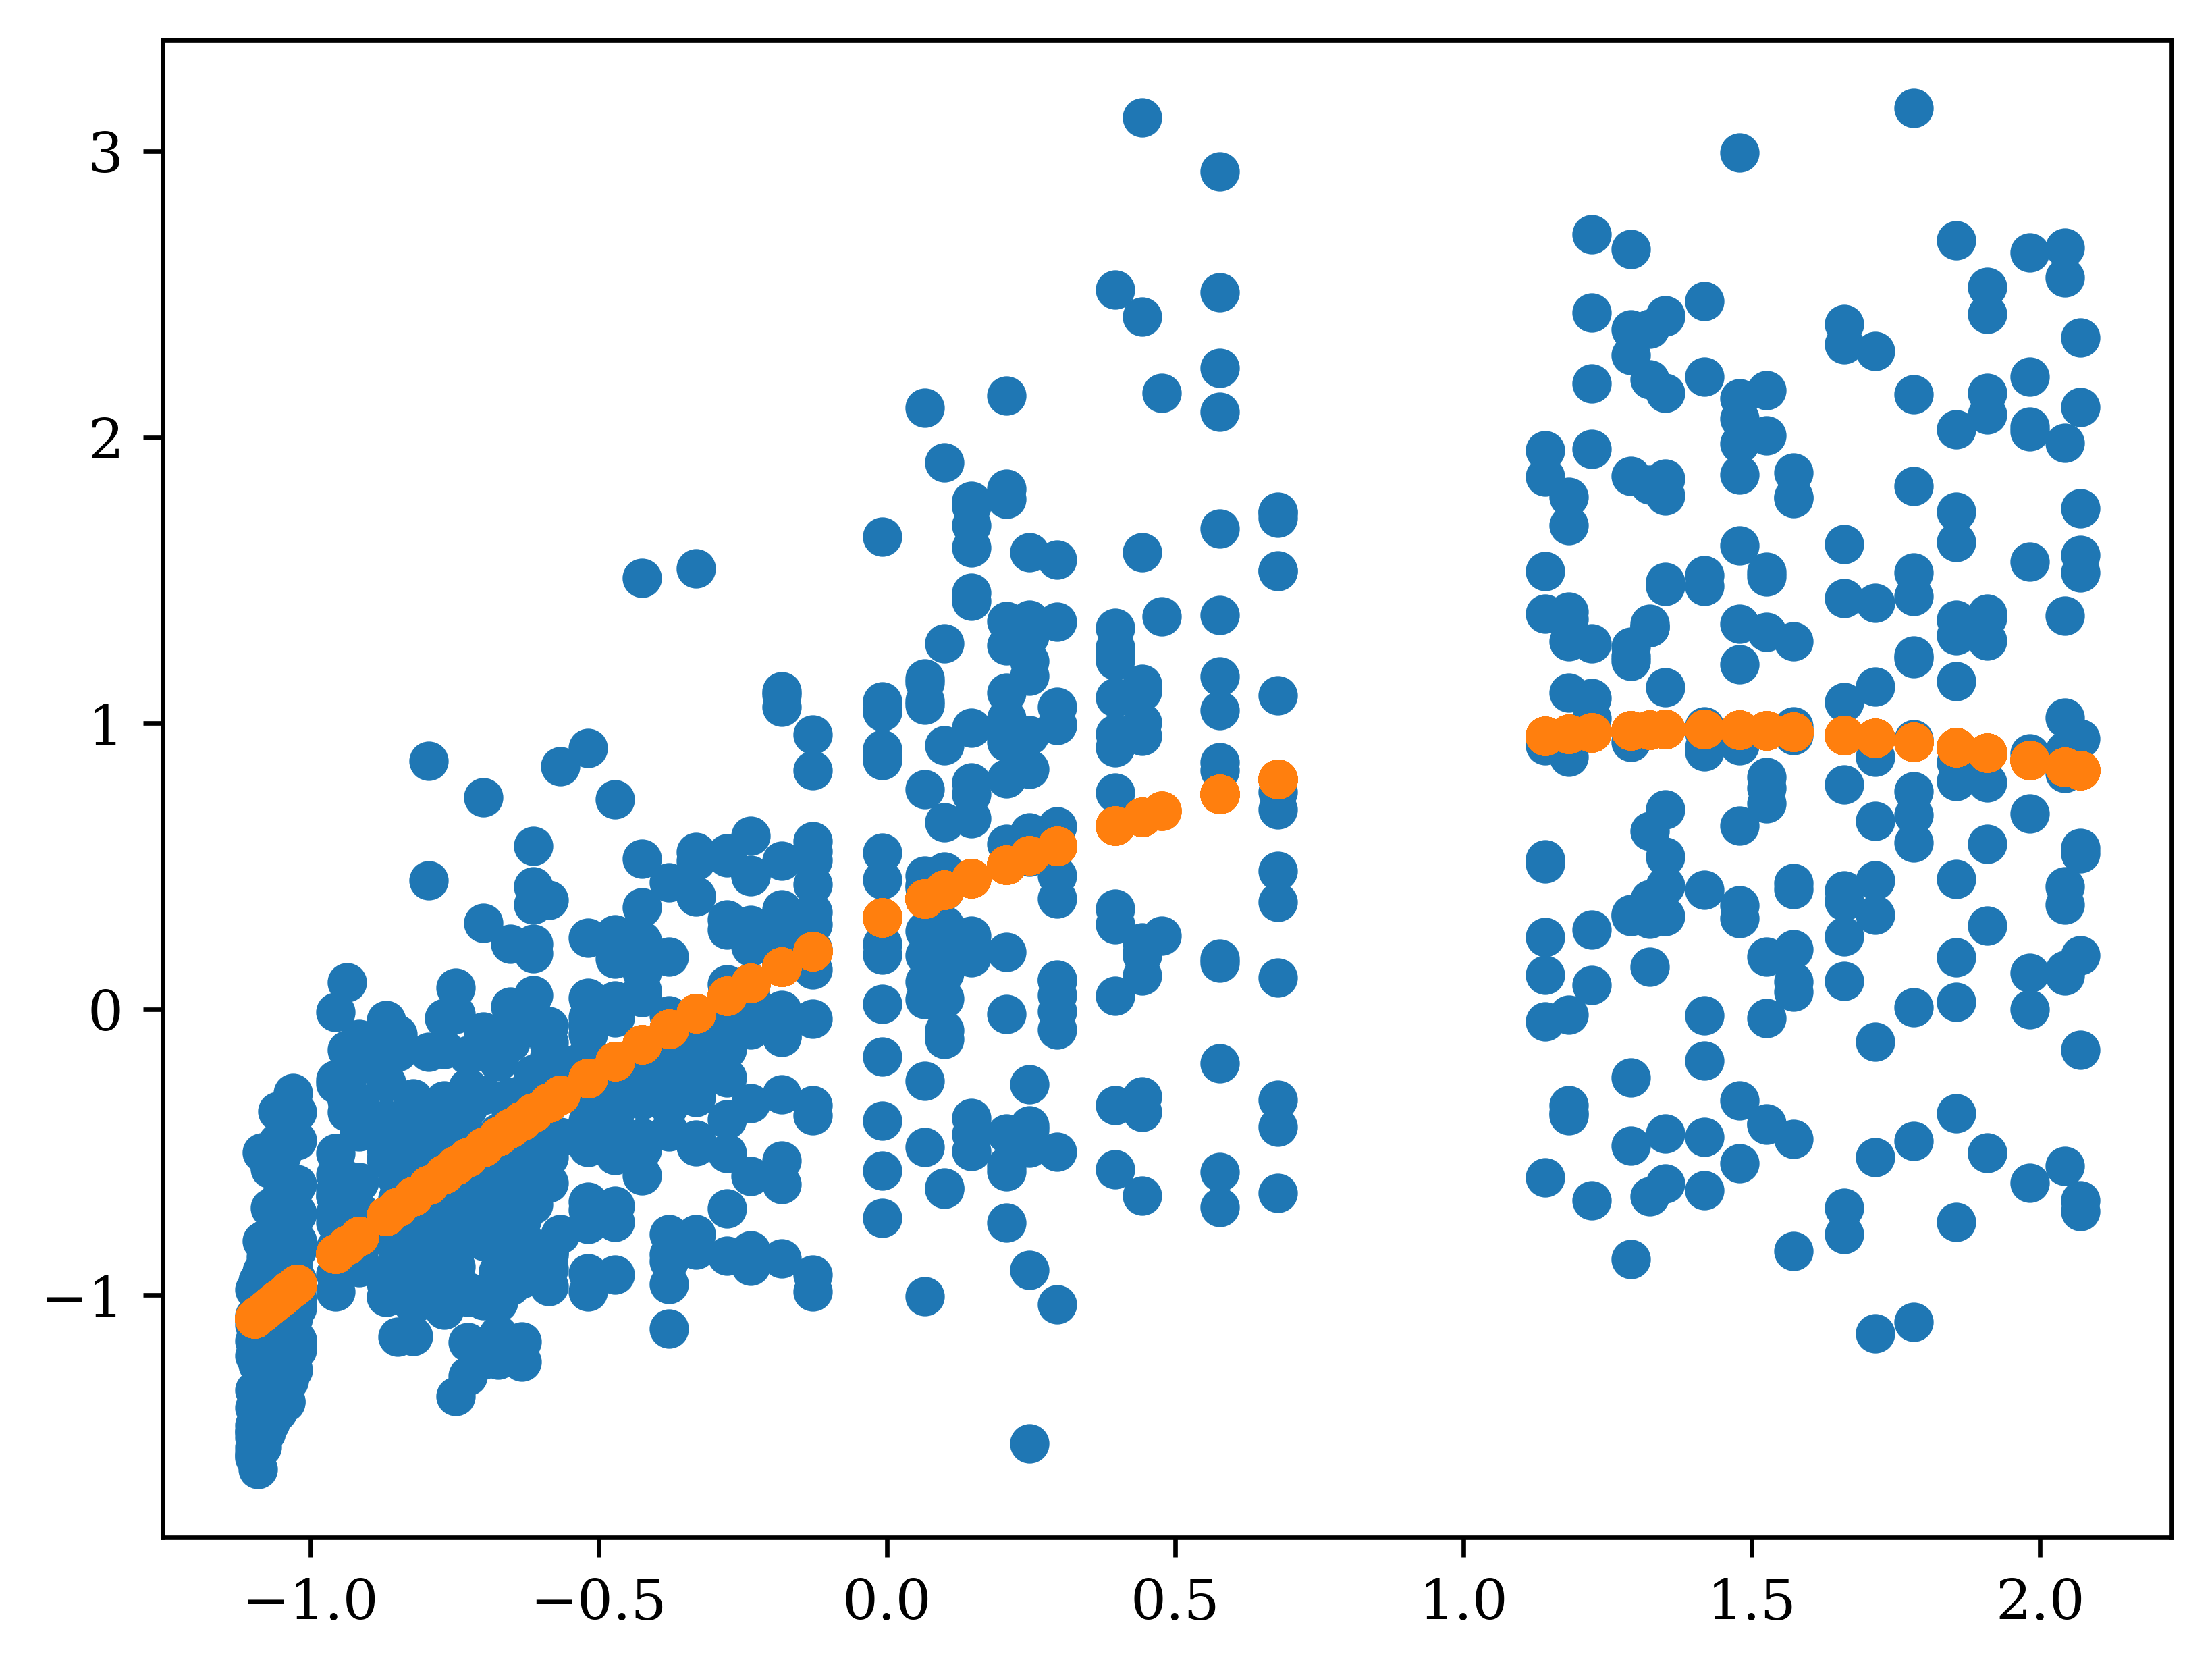

In [49]:
plt.scatter(x[:, 0], y[:, 0])
plt.scatter(x[:, 0], cv.predict(x).squeeze())
# plt.scatter(x[:, 0], mdl.predict(x[:, [0]]).squeeze())

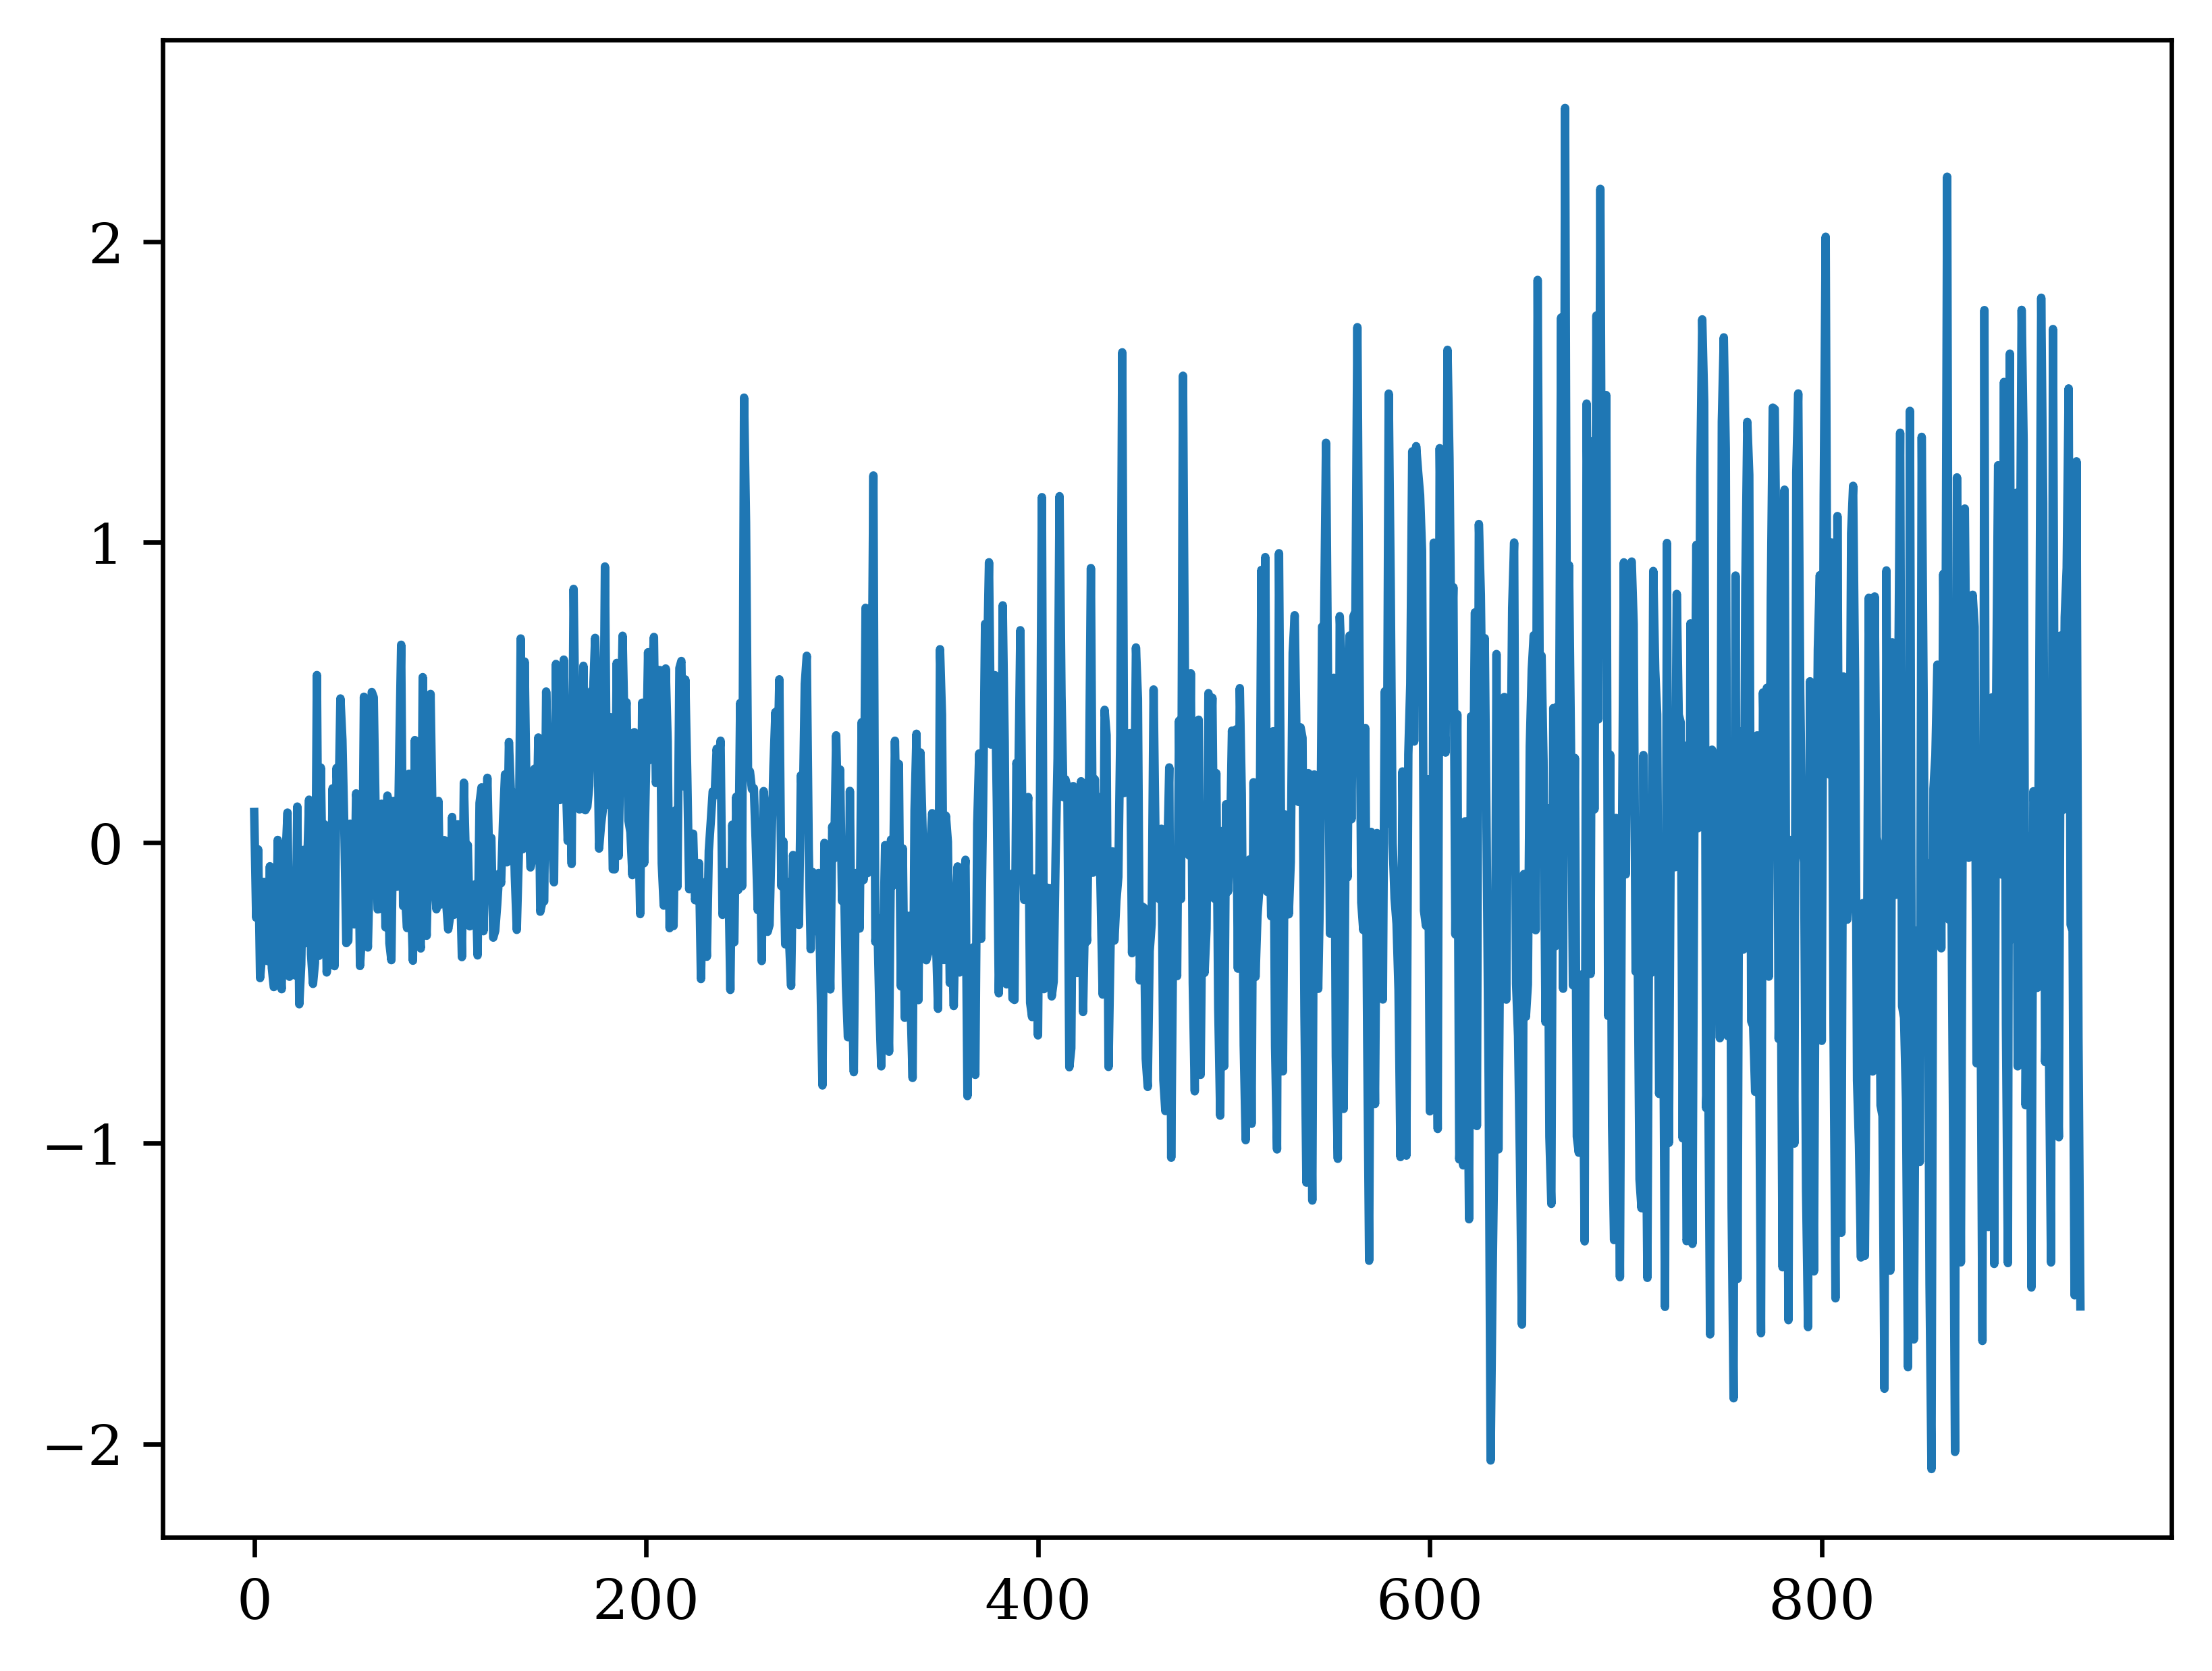

In [50]:
plt.plot(y[:, 0] - cv.predict(x).squeeze())

In [51]:
cv.best_estimator_.coef_

{'exponential_params': {'a': Array([[0.32115802]], dtype=float32),
  'b': Array([[0.242191]], dtype=float32),
  'c': Array([[0.2394277]], dtype=float32),
  'offset': Array([[-0.09513114]], dtype=float32)},
 'linear_params': {'b': Array([[2.7425344]], dtype=float32),
  'm': Array([[6.804414]], dtype=float32)},
 'logistic_params': {'b': Array([[-0.04826392]], dtype=float32),
  'm': Array([[0.41473916]], dtype=float32),
  'offset': Array([[0.00454768]], dtype=float32),
  'scale': Array([[0.22186798]], dtype=float32)},
 'quadratic_params': {'a': Array([[-3.058235]], dtype=float32),
  'b': Array([[7.344308]], dtype=float32),
  'c': Array([[2.541962]], dtype=float32)},
 'submodel_weights': Array([[9.9999999e-09],
        [2.0112652e-02],
        [9.9999999e-09],
        [1.0725803e-01]], dtype=float32)}

In [52]:
cv.fit(x, y[:, 1])

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=0, test_size=0.3, train_size=None),
             estimator=JaxRegressor(coef_shapes={'exponential_params': {'a': (1,
                                                                              1),
                                                                        'b': (1,
                                                                              1),
                                                                        'c': (1,
                                                                              1),
                                                                        'offset': (1,
                                                                                   1)},
                                                 'linear_params': {'b': (1, 1),
                                                                   'm': (1, 1)},
                                                 'logistic_params': {'b': (1,
                                                                           1),
                                                                     'm': (1,
                                                                           1),
                                                                     'offset': (1,
                                                                                1),
                                                                     'scale': (1,
                                                                               1)},
                                                 'quadratic_params': {'a': (1,
                                                                            1),
                                                                      'b': (1,
                                                                            1),
                                                                      'c': (1,
                                                                            1)},
                                                 'submodel_weights': (4, 1)},
                                    l1=0.001,
                                    loss_fun=<function model_loss_l1 at 0x7fb7d1250430>,
                                    lr=0.01,
                                    model=<function multi_model_function at 0x7fb7d1250af0>,
                                    n_iter=4000),
             param_grid={'l1': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00])})

In [53]:
cv.best_params_

{'l1': 0.001}

In [54]:
cv.best_score_

0.19879200588247217

In [55]:
cv.best_estimator_.coef_

{'exponential_params': {'a': Array([[0.73215896]], dtype=float32),
  'b': Array([[0.08981273]], dtype=float32),
  'c': Array([[0.800485]], dtype=float32),
  'offset': Array([[0.11422449]], dtype=float32)},
 'linear_params': {'b': Array([[0.5168281]], dtype=float32),
  'm': Array([[1.2199103]], dtype=float32)},
 'logistic_params': {'b': Array([[0.30804983]], dtype=float32),
  'm': Array([[0.04529287]], dtype=float32),
  'offset': Array([[-0.00692141]], dtype=float32),
  'scale': Array([[-0.09974468]], dtype=float32)},
 'quadratic_params': {'a': Array([[-0.66112757]], dtype=float32),
  'b': Array([[0.93390054]], dtype=float32),
  'c': Array([[0.34529027]], dtype=float32)},
 'submodel_weights': Array([[9.9999999e-09],
        [2.2518785e-01],
        [9.9999999e-09],
        [3.6850712e-01]], dtype=float32)}

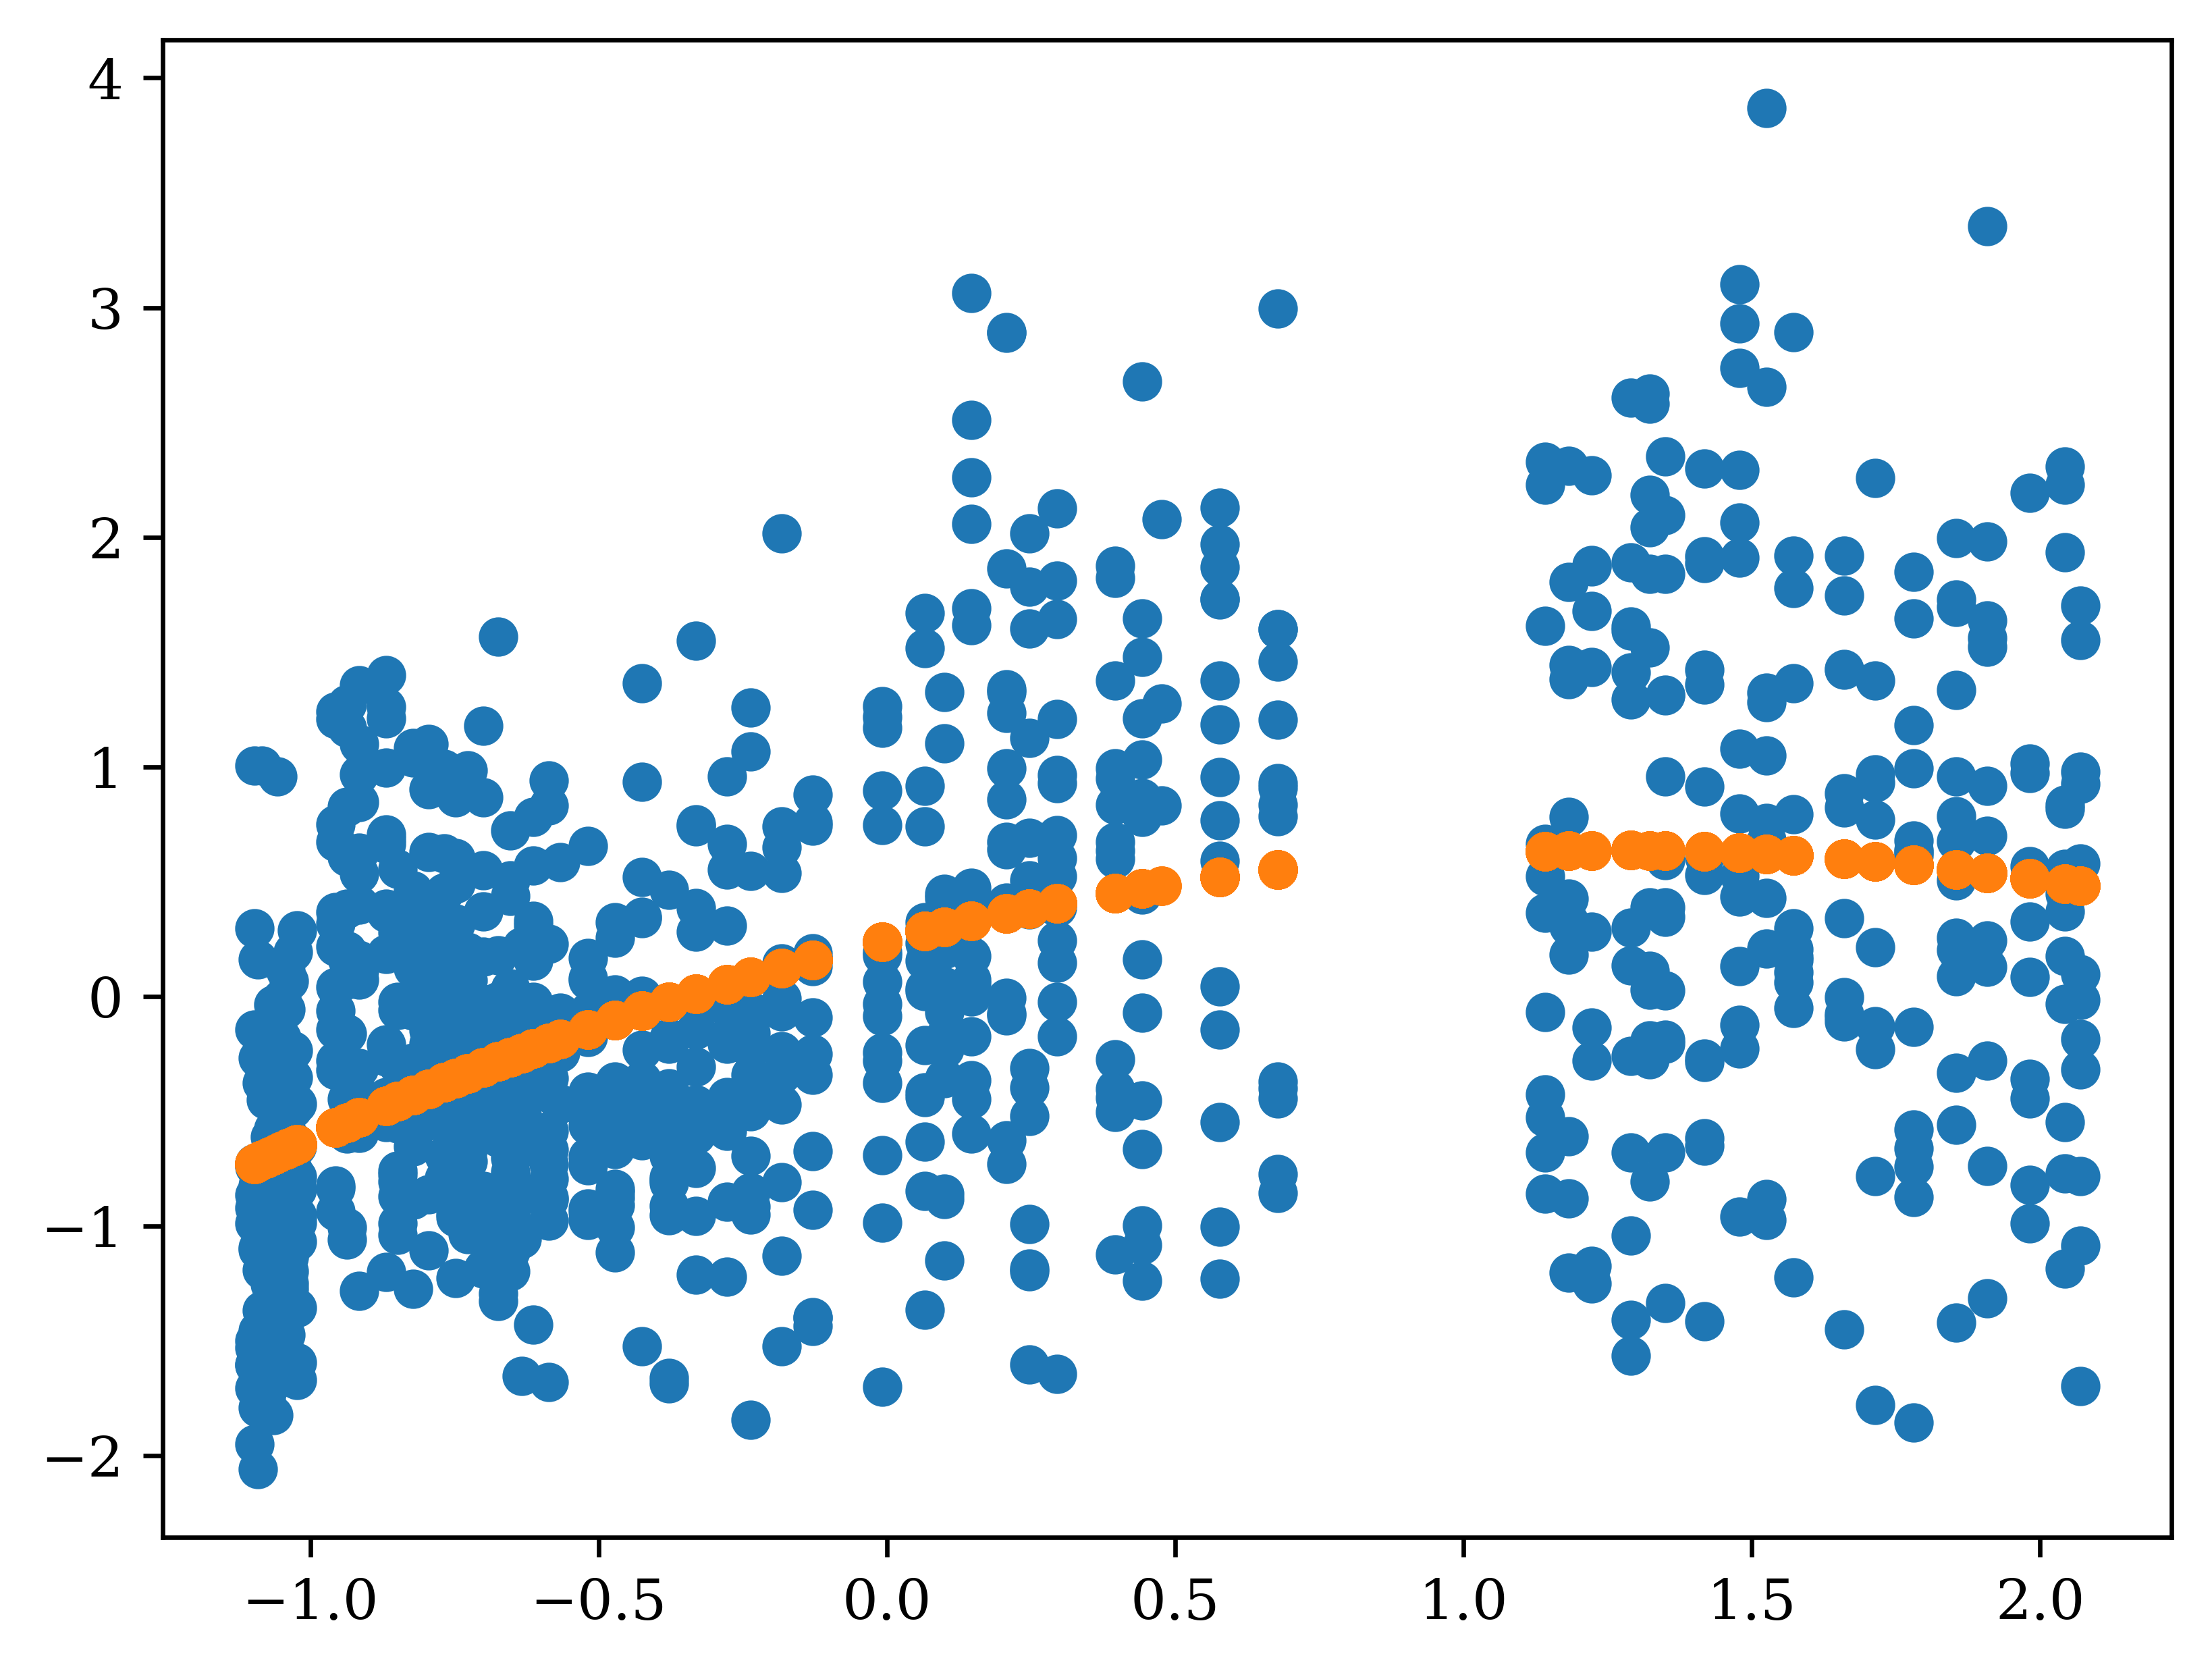

In [56]:
plt.scatter(x[:, 0], y[:, 1])
plt.scatter(x[:, 0], cv.predict(x).squeeze())

In [57]:
cv.fit(x, y[:, 2])

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=0, test_size=0.3, train_size=None),
             estimator=JaxRegressor(coef_shapes={'exponential_params': {'a': (1,
                                                                              1),
                                                                        'b': (1,
                                                                              1),
                                                                        'c': (1,
                                                                              1),
                                                                        'offset': (1,
                                                                                   1)},
                                                 'linear_params': {'b': (1, 1),
                                                                   'm': (1, 1)},
                                                 'logistic_params': {'b': (1,
                                                                           1),
                                                                     'm': (1,
                                                                           1),
                                                                     'offset': (1,
                                                                                1),
                                                                     'scale': (1,
                                                                               1)},
                                                 'quadratic_params': {'a': (1,
                                                                            1),
                                                                      'b': (1,
                                                                            1),
                                                                      'c': (1,
                                                                            1)},
                                                 'submodel_weights': (4, 1)},
                                    l1=0.001,
                                    loss_fun=<function model_loss_l1 at 0x7fb7d1250430>,
                                    lr=0.01,
                                    model=<function multi_model_function at 0x7fb7d1250af0>,
                                    n_iter=4000),
             param_grid={'l1': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00])})

In [58]:
cv.best_params_

{'l1': 1e-05}

In [59]:
cv.best_score_

0.4071560458568529

In [60]:
cv.best_estimator_.coef_

{'exponential_params': {'a': Array([[1.2522455]], dtype=float32),
  'b': Array([[0.6483333]], dtype=float32),
  'c': Array([[1.2138145]], dtype=float32),
  'offset': Array([[-1.5320536]], dtype=float32)},
 'linear_params': {'b': Array([[-0.47808522]], dtype=float32),
  'm': Array([[0.05026776]], dtype=float32)},
 'logistic_params': {'b': Array([[0.1355393]], dtype=float32),
  'm': Array([[0.2139655]], dtype=float32),
  'offset': Array([[-0.01256976]], dtype=float32),
  'scale': Array([[0.02095171]], dtype=float32)},
 'quadratic_params': {'a': Array([[-0.99007964]], dtype=float32),
  'b': Array([[-1.5871425]], dtype=float32),
  'c': Array([[-1.4720031]], dtype=float32)},
 'submodel_weights': Array([[1.2233788e+00],
        [1.5207693e-01],
        [9.9999999e-09],
        [1.8532370e+00]], dtype=float32)}

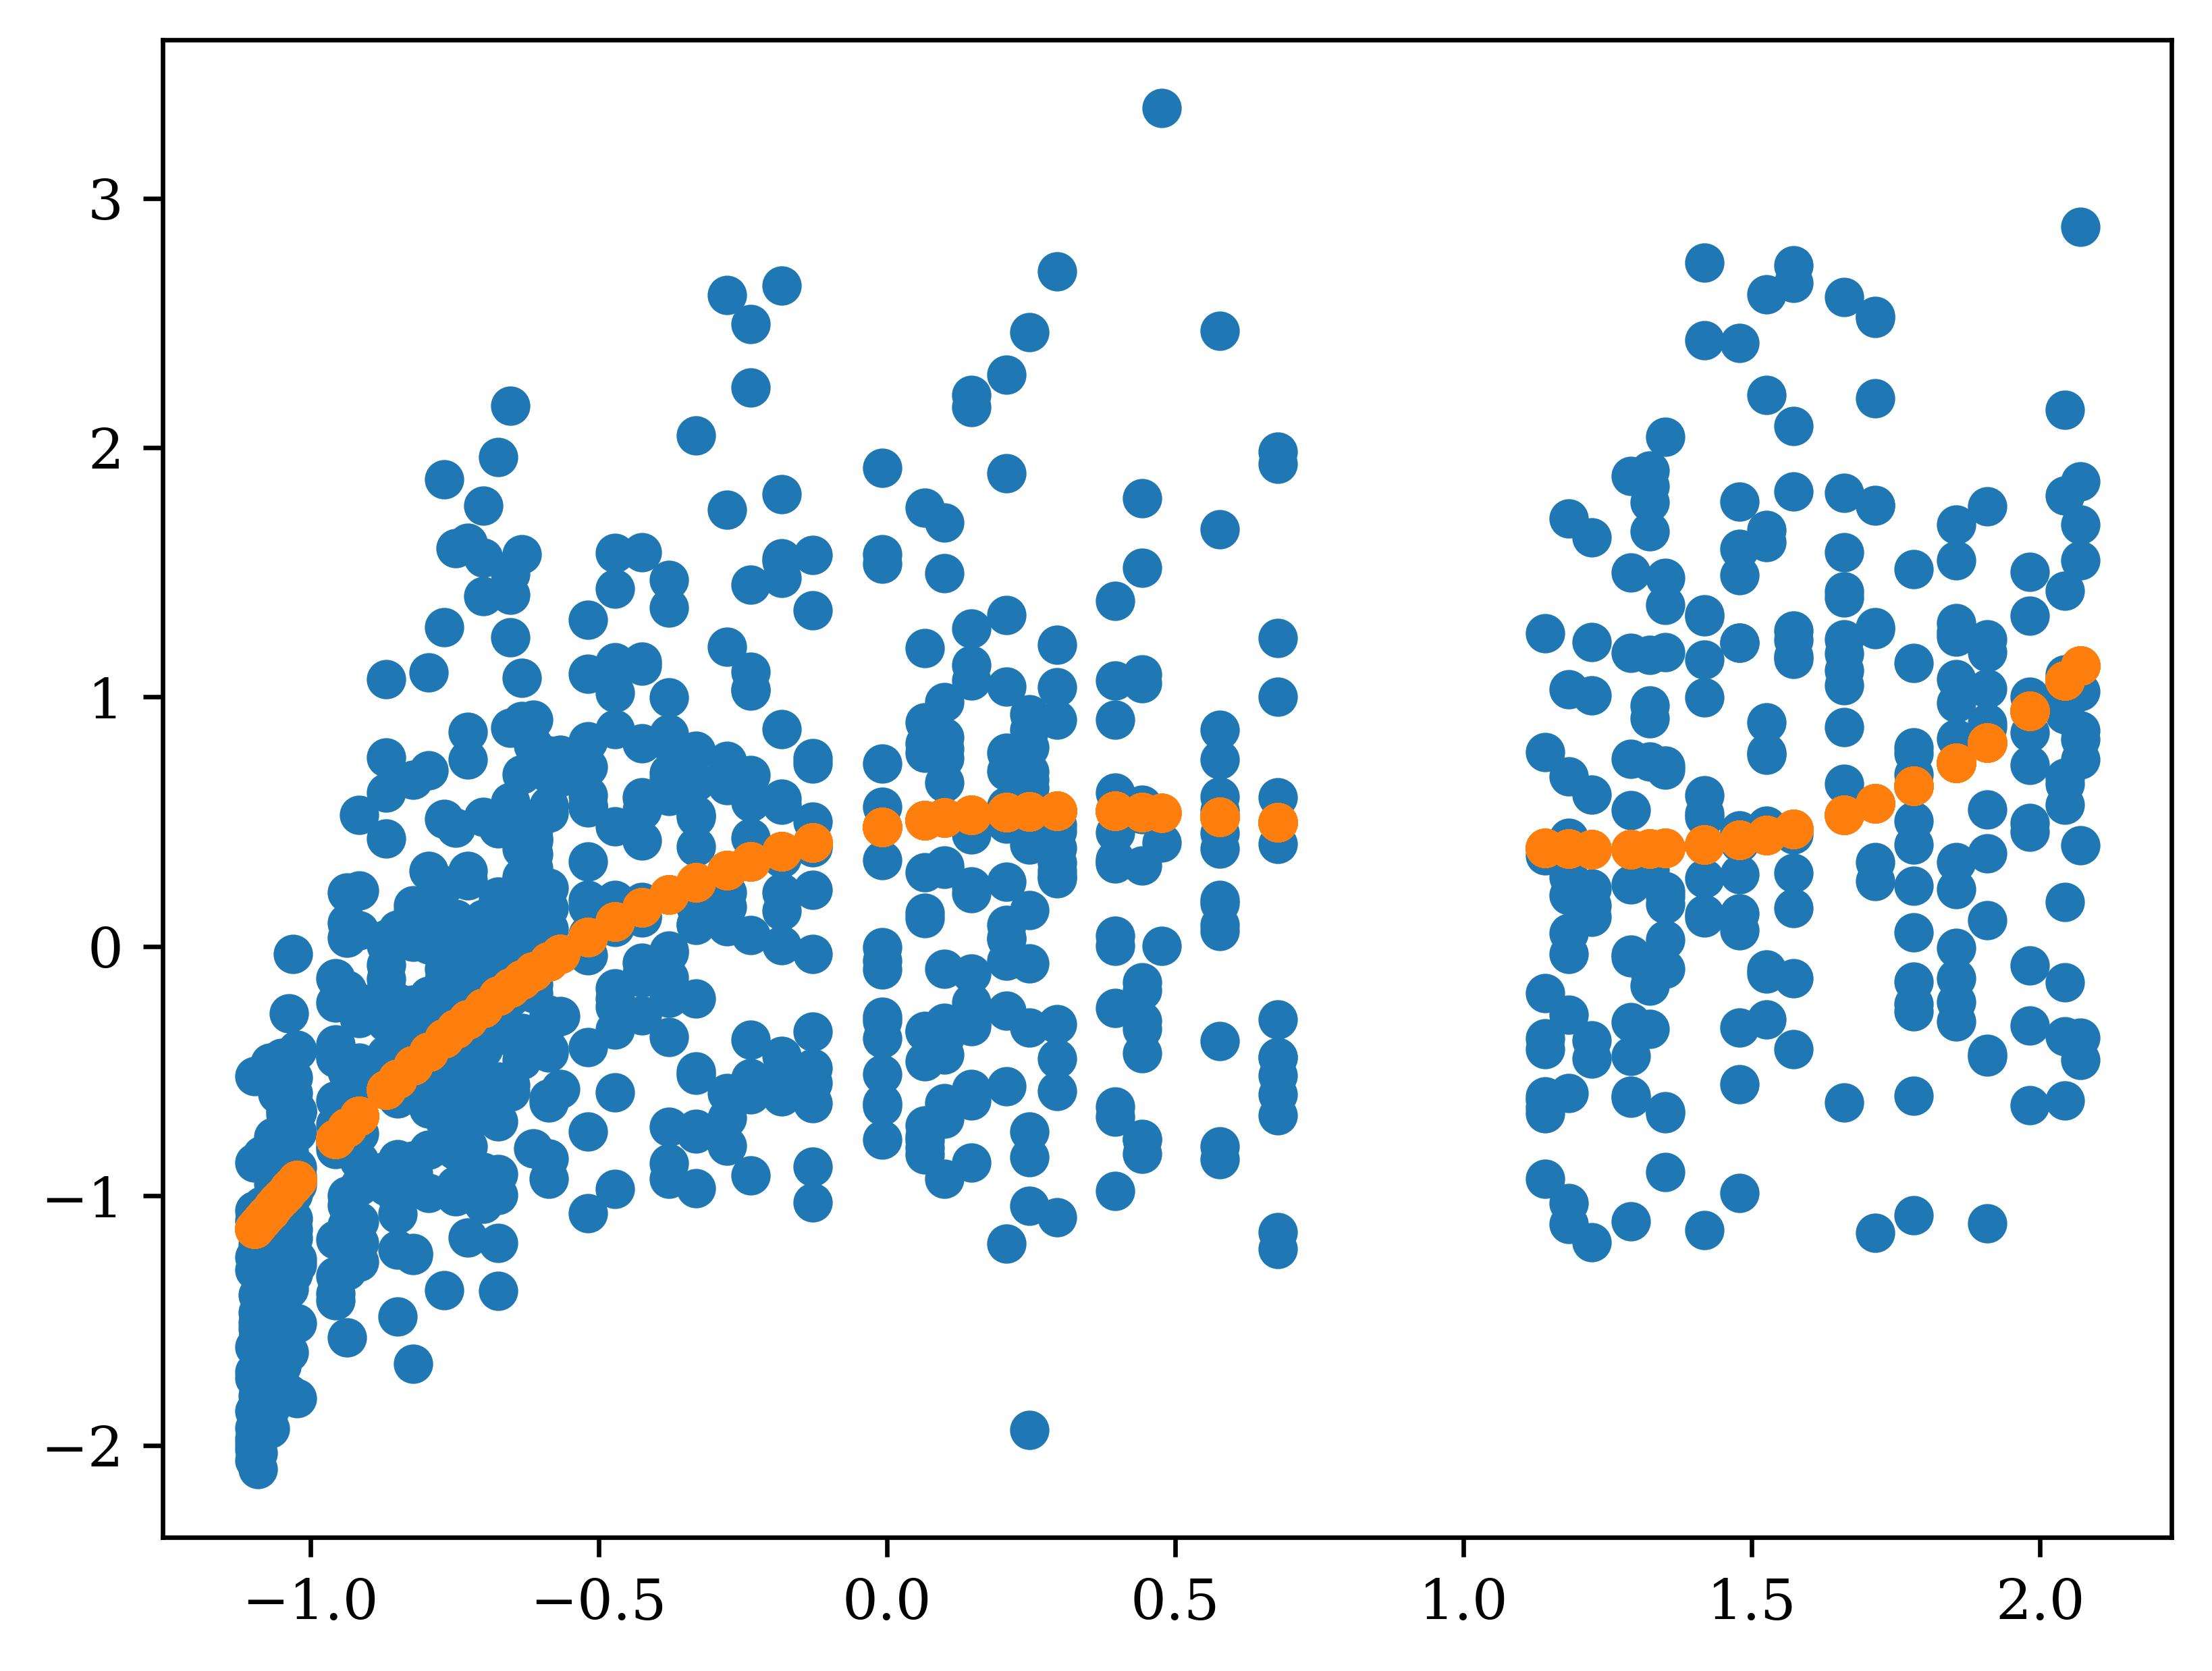

In [61]:
plt.scatter(x[:, 0], y[:, 2])
plt.scatter(x[:, 0], cv.predict(x).squeeze())

In [62]:
cv.fit(x, y[:, 24])

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=0, test_size=0.3, train_size=None),
             estimator=JaxRegressor(coef_shapes={'exponential_params': {'a': (1,
                                                                              1),
                                                                        'b': (1,
                                                                              1),
                                                                        'c': (1,
                                                                              1),
                                                                        'offset': (1,
                                                                                   1)},
                                                 'linear_params': {'b': (1, 1),
                                                                   'm': (1, 1)},
                                                 'logistic_params': {'b': (1,
                                                                           1),
                                                                     'm': (1,
                                                                           1),
                                                                     'offset': (1,
                                                                                1),
                                                                     'scale': (1,
                                                                               1)},
                                                 'quadratic_params': {'a': (1,
                                                                            1),
                                                                      'b': (1,
                                                                            1),
                                                                      'c': (1,
                                                                            1)},
                                                 'submodel_weights': (4, 1)},
                                    l1=0.001,
                                    loss_fun=<function model_loss_l1 at 0x7fb7d1250430>,
                                    lr=0.01,
                                    model=<function multi_model_function at 0x7fb7d1250af0>,
                                    n_iter=4000),
             param_grid={'l1': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00])})

In [63]:
cv.best_params_

{'l1': 0.0031622776601683794}

In [64]:
cv.best_score_

0.08145758104978823

In [65]:
cv.best_estimator_.coef_

{'exponential_params': {'a': Array([[0.03536838]], dtype=float32),
  'b': Array([[-0.04749927]], dtype=float32),
  'c': Array([[-0.04098358]], dtype=float32),
  'offset': Array([[-0.07785596]], dtype=float32)},
 'linear_params': {'b': Array([[0.02949802]], dtype=float32),
  'm': Array([[0.08693574]], dtype=float32)},
 'logistic_params': {'b': Array([[0.5692454]], dtype=float32),
  'm': Array([[0.94971406]], dtype=float32),
  'offset': Array([[-0.02015046]], dtype=float32),
  'scale': Array([[-0.6524927]], dtype=float32)},
 'quadratic_params': {'a': Array([[0.52176553]], dtype=float32),
  'b': Array([[-1.8495685]], dtype=float32),
  'c': Array([[-0.5216874]], dtype=float32)},
 'submodel_weights': Array([[9.9999999e-09],
        [9.9999999e-09],
        [9.9999999e-09],
        [1.7061031e-01]], dtype=float32)}

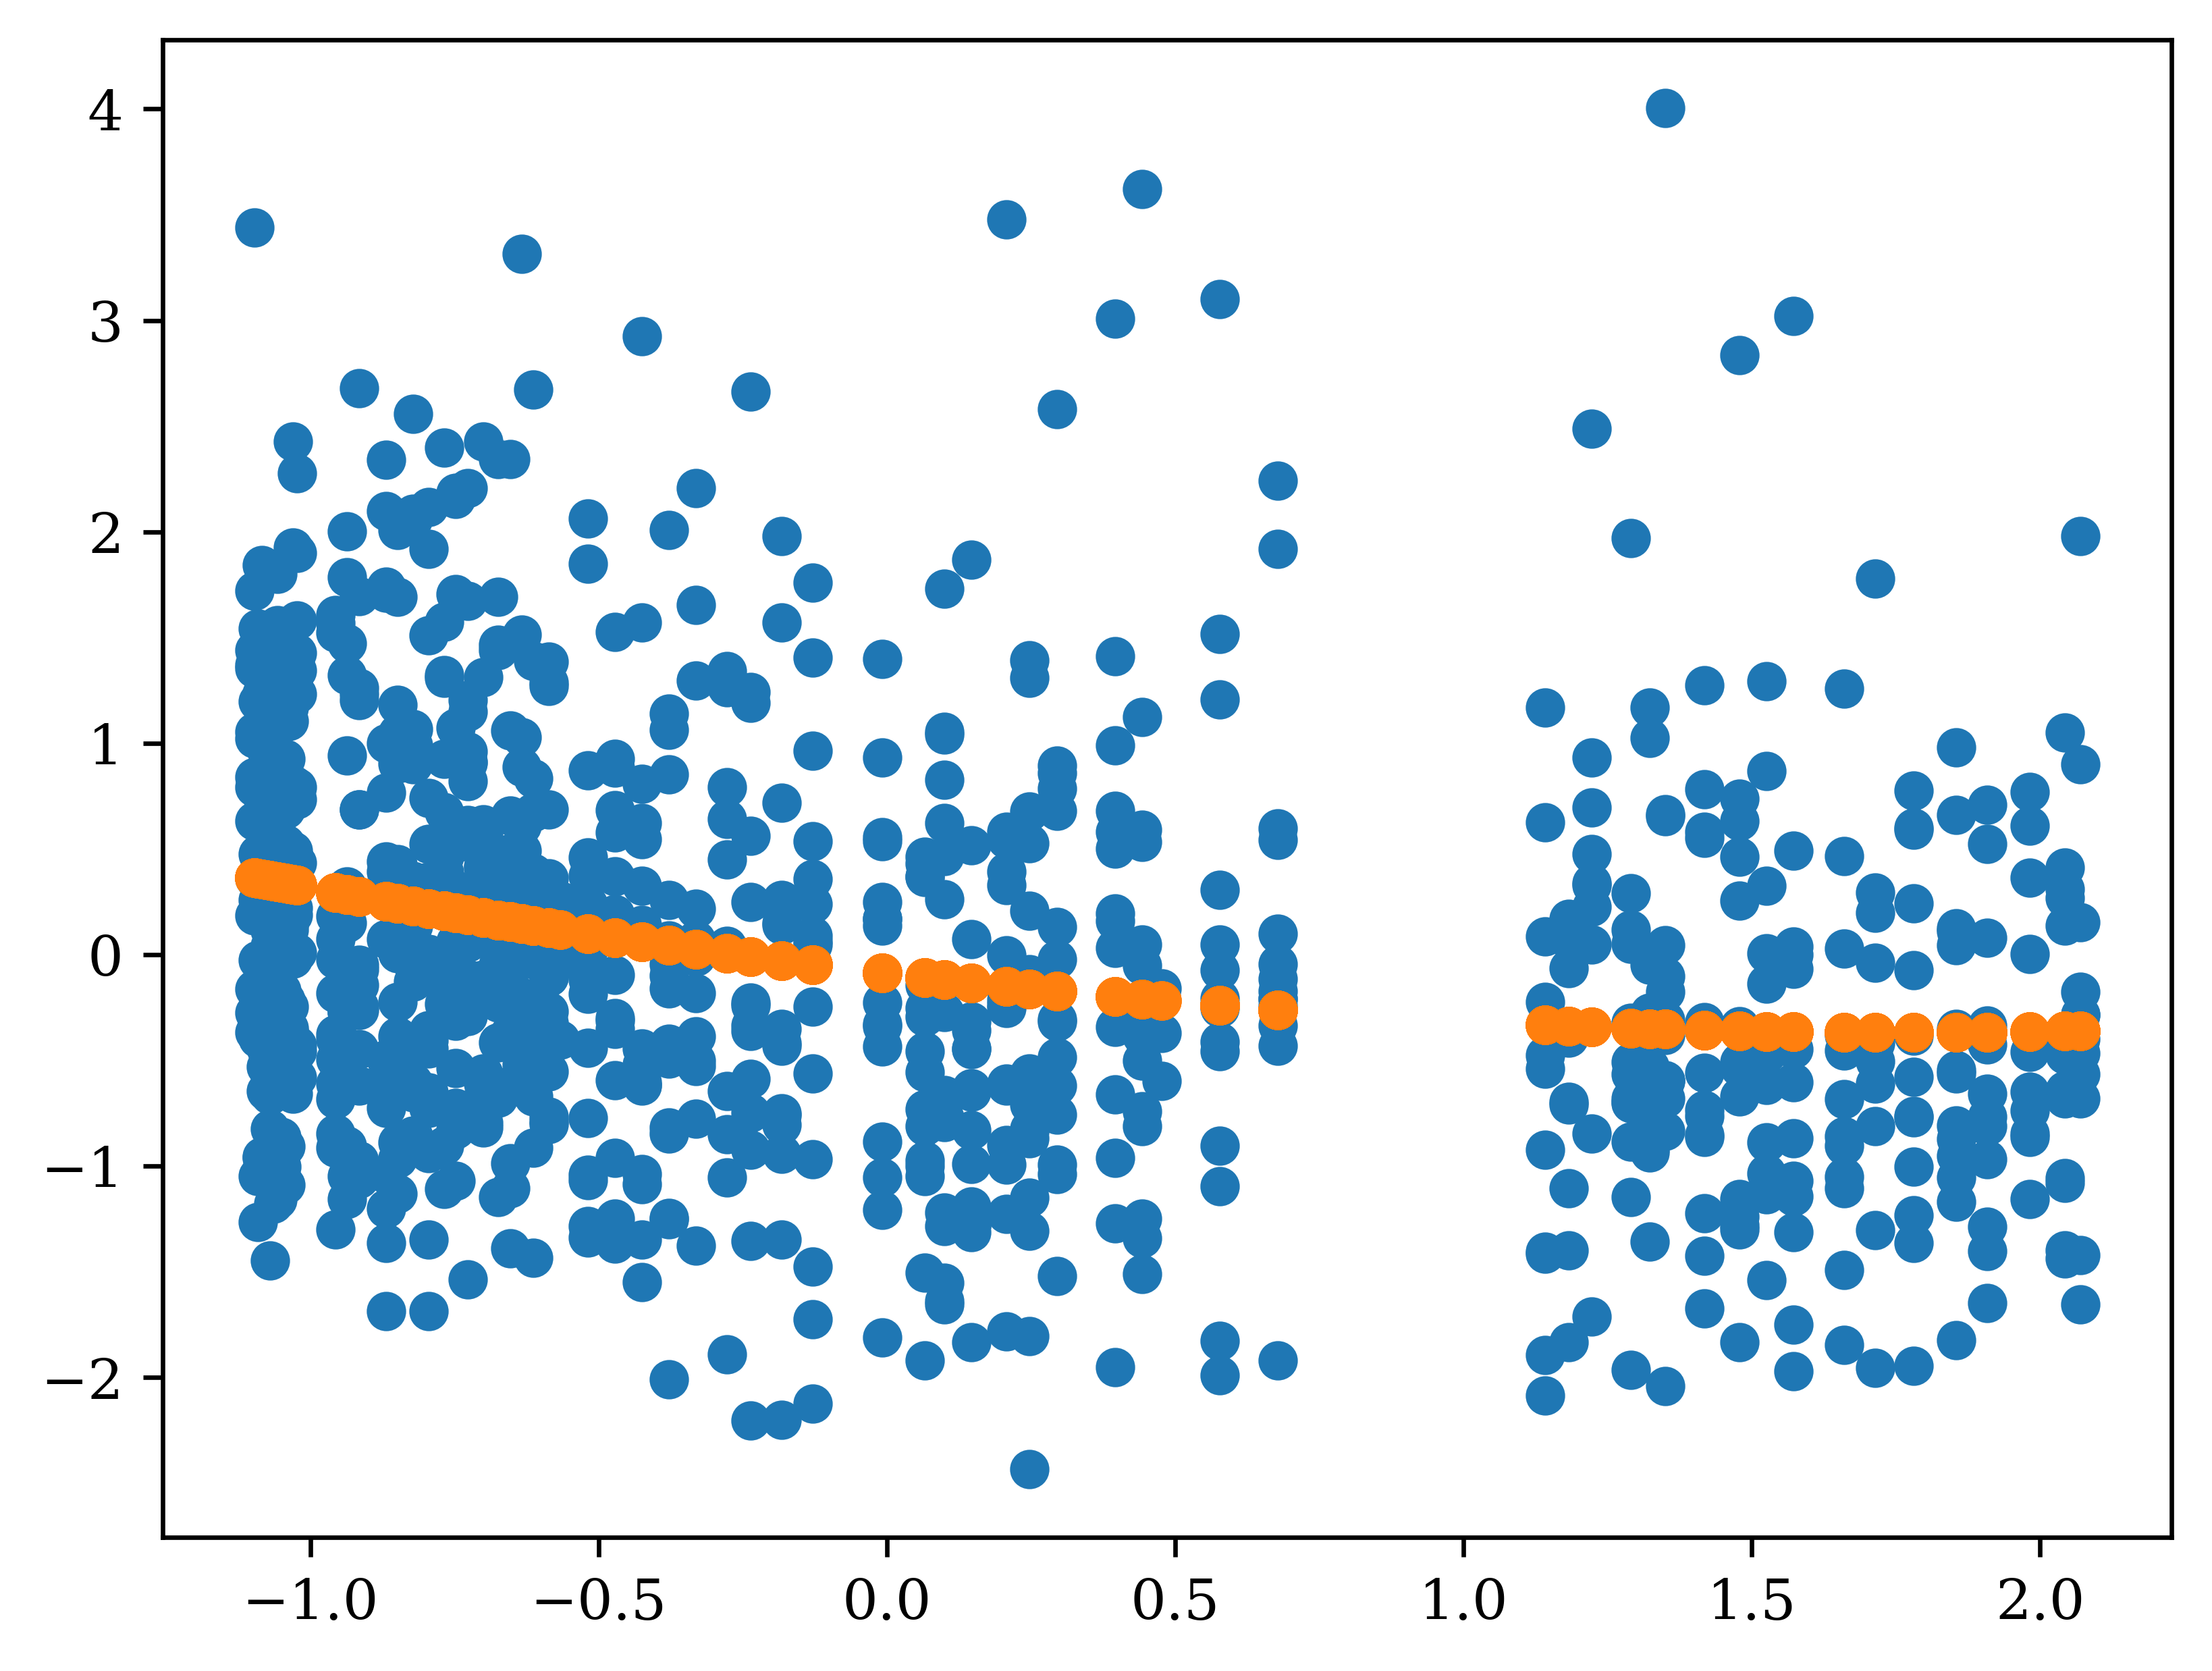

In [66]:
plt.scatter(x[:, 0], y[:, 24])
plt.scatter(x[:, 0], cv.predict(x).squeeze())